In [15]:
# Source https://blog.keras.io/building-autoencoders-in-keras.html
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
# normalization of input
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# resahaping the image to 1D vectors
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_train.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [17]:
#AutoEncoder Model
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [18]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 6s 17ms/step - loss: 0.2459 - val_loss: 0.1681
Epoch 2/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1497 - val_loss: 0.1355
Epoch 3/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1308 - val_loss: 0.1259
Epoch 4/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1225 - val_loss: 0.1174
Epoch 5/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1151 - val_loss: 0.1109
Epoch 6/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1101 - val_loss: 0.1072
Epoch 7/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1063 - val_loss: 0.1035
Epoch 8/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1037 - val_loss: 0.1017
Epoch 9/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1018 - val_loss: 0.1000
Epoch 10/100
235/235 [==============================] - 3s 15ms/step - loss: 0.100

235/235 [==============================] - 3s 15ms/step - loss: 0.0807 - val_loss: 0.0806
Epoch 81/100
235/235 [==============================] - 4s 15ms/step - loss: 0.0807 - val_loss: 0.0805
Epoch 82/100
235/235 [==============================] - 3s 15ms/step - loss: 0.0806 - val_loss: 0.0804
Epoch 83/100
235/235 [==============================] - 3s 15ms/step - loss: 0.0806 - val_loss: 0.0803
Epoch 84/100
235/235 [==============================] - 4s 15ms/step - loss: 0.0805 - val_loss: 0.0803
Epoch 85/100
235/235 [==============================] - 3s 15ms/step - loss: 0.0805 - val_loss: 0.0803
Epoch 86/100
235/235 [==============================] - 3s 15ms/step - loss: 0.0805 - val_loss: 0.0802
Epoch 87/100
235/235 [==============================] - 4s 15ms/step - loss: 0.0804 - val_loss: 0.0802
Epoch 88/100
235/235 [==============================] - 4s 15ms/step - loss: 0.0804 - val_loss: 0.0803
Epoch 89/100
235/235 [==============================] - 4s 15ms/step - loss: 0.0804 - 

313/313 [==============================] - 3s 5ms/step


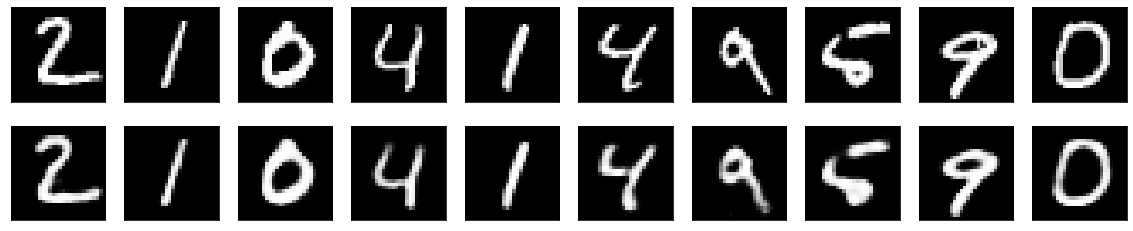

In [23]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()